# Synthetic Image Generator for YOLOv2

This notebook generates synthetic images for the training, validation and testing. The output of this notebook is required by the **Training+Export.ipynb** notebook.

Authors(s): *Martin Fränzl*

## Required packages

In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

import os
import matplotlib.patches as patches

from tqdm import tqdm # Progress bar

from xml_writer import Writer # Writes XML files in the Pascal VOC format 
import image_generator as ig 

## Display single image for parameter adjustments

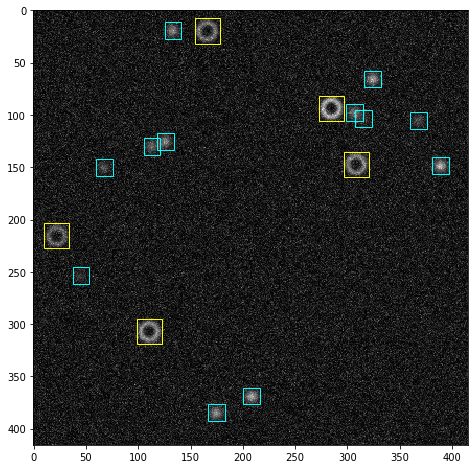

In [3]:
image_w = 416
image_h = 416
n_list = [[1, 20], [1, 10]]
label_list = ['Spot', 'Ring']
color_list = ['cyan', 'yellow']
parameters_list = [[[0], [4]], [[0], [8], [2]]] 
snr_range = [1, 30]
i_range = [0.1, 1]
distance = 10
offset = 15

objects = ig.getRandom(1, [np.random.randint(n_list[0][0], n_list[0][1] + 1), 
                           np.random.randint(n_list[1][0], n_list[1][1] + 1)], image_w, image_h, distance, offset, label_list, parameters_list)[0]
                    
bboxes, labels, image = ig.generateImage(objects, image_w, image_h, snr_range, i_range)

fig = plt.figure(figsize=(8,8))
plt.imshow(image, cmap='gray')
ax = fig.gca()
for bbox, label in zip(bboxes, labels):
    x, y = bbox[0]
    x1, y1 = bbox[1]
    ax.add_patch(patches.Rectangle((x,y), x1-x, y1-y, linewidth=1, edgecolor=color_list[np.where(np.array(label_list) == label)[0][0]], facecolor='none'))

## Generate images for training, validation and testing

In [4]:
subdir = 'Dataset/'
nimages = [25000, 5000, 100]
folders = ['train', 'valid', 'test']

if not os.path.exists(subdir):
    os.mkdir(subdir)
for i, prefix in enumerate(folders):

    i_dir = subdir + '/' + prefix + '_images/'
    if not os.path.exists(i_dir):
        os.mkdir(i_dir)
    a_dir = subdir + '/' + prefix + '_annotations/'
    if not os.path.exists(a_dir):
        os.mkdir(a_dir)
        
    for i in tqdm(range(nimages[i])):
        objects = ig.getRandom(1, [np.random.randint(n_list[0][0], n_list[0][1] + 1), 
                                   np.random.randint(n_list[1][0], n_list[1][1] + 1)], image_w, image_h, distance, offset, label_list, parameters_list)[0]
        bboxes, labels, image = ig.generateImage(objects, image_w, image_h, snr_range, i_range) 
        fname = i_dir + 'image_{:04d}.jpg'.format(i,2)
        plt.imsave(fname, image, cmap='gray')
        writer = Writer(fname, image_w, image_h)
        for bbox, label in zip(bboxes, labels):
            x, y = bbox[0]
            x1, y1 = bbox[1]
            writer.addObject(label, x, y, x1, y1)
        xmlname = a_dir + 'image_{:04d}.xml'.format(i,2)    
        writer.save(xmlname)
        
ig.exportConfig(subdir + 'info.txt', nimages, label_list, parameters_list, n_list, snr_range, i_range, distance, offset)

100%|██████████| 100/100 [00:19<00:00,  5.06it/s]
